## Import modules

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

## Read our dataset

In [8]:
sales = pd.read_csv('vgsales.csv')
sales.shape
sales.head()

(16598, 11)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Data - Regional sales, grouped by Genre 

In [9]:
genre = sales[[ "Genre", 'NA_Sales','EU_Sales','JP_Sales']].groupby(['Genre'], as_index=False).sum()
genre

,Genre,NA_Sales,EU_Sales,JP_Sales
0,Action,877.83,525.00,159.95
1,Adventure,105.80,64.13,52.07
2,Fighting,223.59,101.32,87.35
3,Misc,410.24,215.98,107.76
4,Platform,447.05,201.63,130.77
5,Puzzle,123.78,50.78,57.31
6,Racing,359.42,238.39,56.69
7,Role-Playing,327.28,188.06,352.31
8,Shooter,582.60,313.27,38.28
9,Simulation,183.31,113.38,63.70


### Drawing the stacked plot

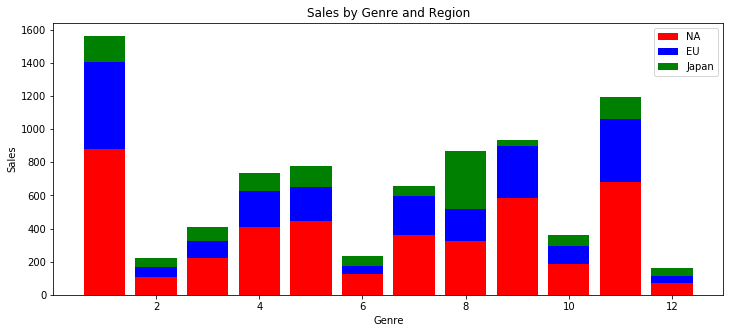

In [10]:
f, ax = plt.subplots(1, figsize=(12,5))

bar_l = [i+1 for i in range(len(genre['NA_Sales']))]
ax.bar(bar_l, genre['NA_Sales'], label='NA', color='red')
ax.bar(bar_l, genre['EU_Sales'], bottom=genre['NA_Sales'], label='EU',color='blue')
ax.bar(bar_l, genre['JP_Sales'], bottom=[i+j for i,j in zip(genre['NA_Sales'],genre['EU_Sales'])], label='Japan',color='green')

ax.set_title("Sales by Genre and Region")
ax.set_xlabel("Genre");
ax.set_ylabel("Sales");
plt.legend(loc='upper right');